<a href="https://colab.research.google.com/github/dilaraozcerit/Data-Science/blob/main/Matplotlib_Assignment_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [40]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [3]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [7]:
gender = kill["gender"].value_counts()
gender

M    2428
F     107
Name: gender, dtype: int64

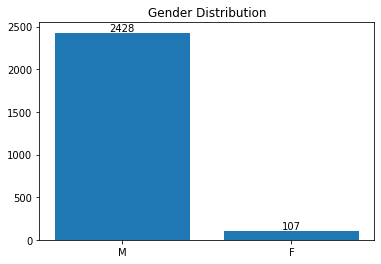

In [10]:
fig, ax = plt.subplots()

ax.bar(gender.index, gender.values)

ax.set_title("Gender Distribution")

for p in range(len(gender.values)):
  plt.text(gender.index[p], gender.values[p], str(gender.values[p]), ha="center", va="bottom")
  
plt.show()

## 2: Plot 7 most common kill weapons

In [11]:
armed = kill["armed"].value_counts().head(7)
armed

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

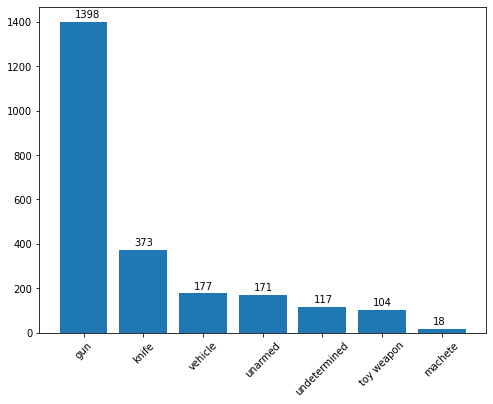

In [15]:
fig, ax = plt.subplots(figsize = (8, 6))       

ax.bar(armed.index, armed.values)
ax.set_xticklabels(armed.index, rotation=45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.25, p.get_height()+20));

plt.show()

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [12]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [41]:
kill["age_cat"] = kill["age"].apply(lambda x : "above25" if x > 25 else "below25")

In [17]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [18]:
cat = kill["age_cat"].value_counts()
cat

above25    1905
below25     630
Name: age_cat, dtype: int64

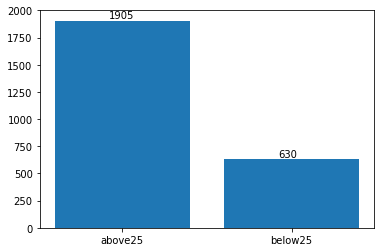

In [19]:
fig, ax = plt.subplots(figsize = (6, 4))       

ax.bar(cat.index, cat.values)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.32, p.get_height()+20));

plt.show()

## 4: Plot number of killed poeple by race

In [22]:
race = kill["race"].value_counts()
race

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

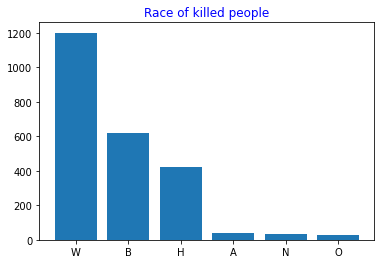

In [23]:
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(race.index, race.values)
plt.title("Race of killed people", color = "blue")
plt.show()

## 5: Killed People According to Races (Pie Chart)

In [24]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [25]:
np.array(kill.race.value_counts(dropna=False).index)

array(['W', 'B', 'H', nan, 'A', 'N', 'O'], dtype=object)

In [ ]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [42]:
kill.shape

(2535, 15)

In [43]:
kill.dropna(inplace=True)

In [44]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [29]:
kill["race"].value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [30]:
i = kill["race"].value_counts().index
i

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [31]:
v = kill["race"].value_counts().values
v

array([1168,  592,  401,   36,   29,   28])

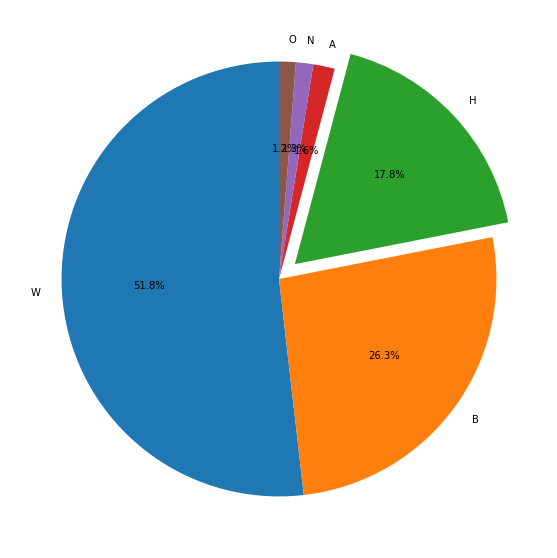

In [34]:
plt.figure(figsize=(10, 10))
myexplode = [0.0, 0.0, 0.1, 0.0, 0.0, 0.0]
plt.pie(v , labels=i, explode=myexplode, autopct='%1.1f%%', startangle=90)
plt.show()


### 6) Most common 15 Name or Surname of killed people

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


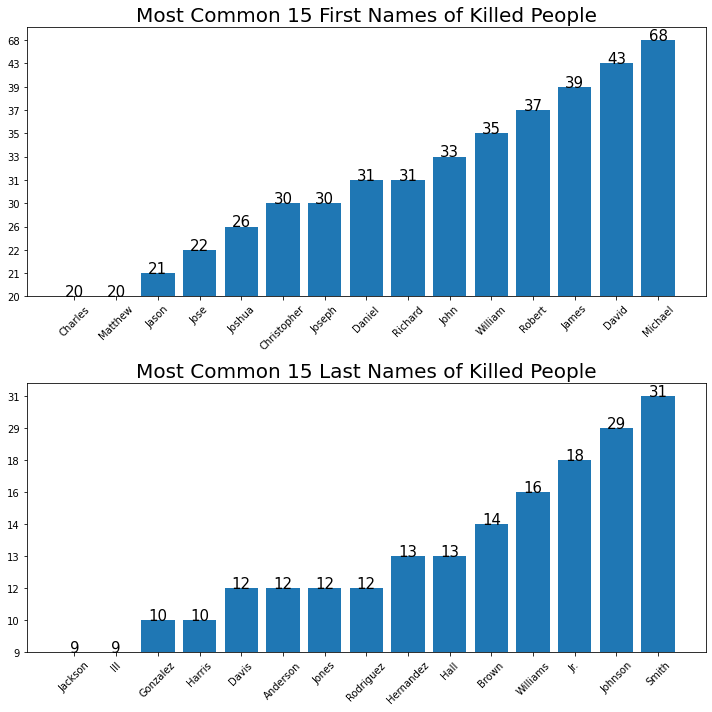

In [46]:
first_name = []
last_name = []
dictt_f = {}
dictt_l = {}
for i in kill.name.values:
    i = i.split()
    last_name.append(i[-1])
    first_name.append(i[0])
for i in first_name:
    dictt_f[i] = dictt_f.get(i, 0) + 1
for i in last_name:
    dictt_l[i] = dictt_l.get(i, 0) + 1
    
first_list = sorted(dictt_f.items(), key=lambda x : x[1], reverse=True)
last_list = sorted(dictt_l.items(), key=lambda x : x[1], reverse=True)

arr_f = np.array(first_list[:15])
arr_l = np.array(last_list[:15])

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
mylabels_f = arr_f[:,0][::-1]
data_f = arr_f[:,1][::-1]
plt.bar(mylabels_f, data_f)
plt.xticks(rotation=45)
plt.title('Most Common 15 First Names of Killed People', fontdict={'fontsize':20})
p = np.arange(len(mylabels_f))
for i in range(len(mylabels_f)):
    plt.text(x=p[i], y=data_f[i], s=data_f[i], ha='center', size=15)

plt.subplot(2,1,2)
mylabels_l = arr_l[:,0][::-1]
data_l = arr_l[:,1][::-1]
plt.bar(mylabels_l, data_l)
plt.xticks(rotation=45)
plt.title('Most Common 15 Last Names of Killed People', fontdict={'fontsize':20})
for i in range(len(mylabels_l)):
    plt.text(x=p[i], y=data_l[i], s=data_l[i], ha='center', size=15)
plt.tight_layout()

In [36]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
stop_words = stopwords.words()
def cleaning(text):        
   # removing the stop-words          
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence
    return text
dt = kill['name'].apply(cleaning)
from collections import Counter
p = Counter(" ".join(dt).split()).most_common(15)
rslt = pd.DataFrame(p, columns=['f_names', 'num'])
print(rslt)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
        f_names  num
0       Michael   82
1         David   53
2         James   47
3        Robert   44
4        Joseph   43
5        Daniel   40
6       William   40
7           Lee   37
8          John   36
9   Christopher   35
10      Richard   33
11        Smith   31
12      Johnson   29
13       Joshua   27
14           J.   27


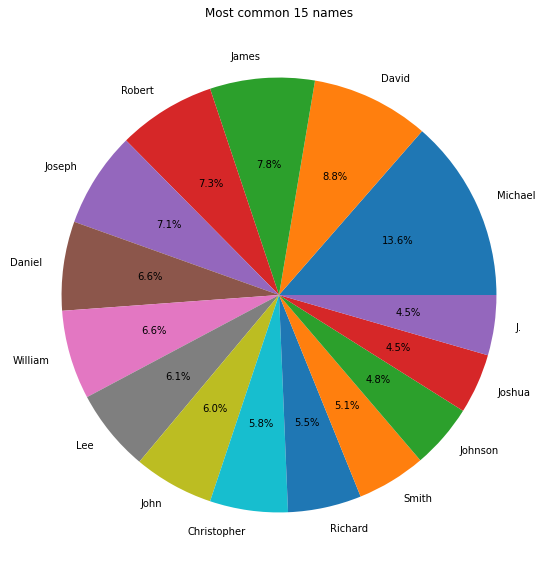

In [37]:
plt.figure(figsize=(10, 10))
plt.pie(rslt.num.values , labels=rslt.f_names.values, autopct='%1.1f%%')
plt.title("Most common 15 names")
plt.show()



---



_DİLARA ÖZCERİT_